In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

# Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# Data Cleanup
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [3]:
df_DA = df[df["job_title_short"] == "Data Analyst"].copy()
df_DA

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
12,Data Analyst,Stagiaire Data Analyst (H/F) - Lyon (69006),"Lyon, France",via Jobijoba,Full-time and Internship,False,France,2023-12-22 13:24:41,False,False,France,None,NaN,NaN,Engie,"[sql, php, excel, power bi, sap, jira]","{'analyst_tools': ['excel', 'power bi', 'sap']..."
18,Data Analyst,Data Analyst,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-10-16 13:36:54,False,False,Poland,None,NaN,NaN,Glovo,"[sql, python, r, redshift, pandas, excel, look...","{'analyst_tools': ['excel', 'looker', 'tableau..."
31,Data Analyst,Stage - Data Analyst F/H,"Paris, France",via LinkedIn,Full-time and Internship,False,France,2023-10-19 13:59:31,False,False,France,None,NaN,NaN,GROUPE BON MARCHÉ : Le Bon Marché Rive Gauche ...,[sql],{'programming': ['sql']}
34,Data Analyst,Data Analyst als Marketing Manager Automation ...,"Erlangen, Germany",via Central Illinois Proud Jobs,Full-time,False,Germany,2023-02-23 13:31:28,True,False,Germany,None,NaN,NaN,DEFACTO GmbH,[sap],{'analyst_tools': ['sap']}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None
785705,Data Analyst,Expert Business Data Analyst - Now Hiring,"Oakland, CA",via Snagajob,Full-time,False,"California, United States",2023-01-09 06:00:25,False,False,United States,None,NaN,NaN,PG&E Corporation,"[sql, python, tableau]","{'analyst_tools': ['tableau'], 'programming': ..."
785715,Data Analyst,Amul Careers 2023 - Apply Online - Data Analys...,India,melalui Jobsleworld - Jobs In India - Job Vaca...,Pekerjaan tetap,False,India,2023-03-13 06:16:28,False,False,India,None,NaN,NaN,Amul,None,None
785717,Data Analyst,Data & Analytics Architect (w/m/x),"Erfurt, Jerman",melalui LinkedIn,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,NTT DATA DACH,"[aws, azure]","{'cloud': ['aws', 'azure']}"


Let's customize the chart we created a few lessons back.

Here's the all the code for the plot.

In [4]:
# create a new column for month number
df_DA["job_posted_month_no"] = df_DA["job_posted_date"].dt.month

In [5]:
# Explode the job_skills column and pivot


df_DA_explode = df_DA.explode("job_skills")
df_DA_pivot = df_DA_explode.pivot_table(index = "job_posted_month_no", columns = "job_skills", aggfunc = "size", fill_value = 0)

In [6]:
# sort the skills by count
df_DA_pivot.loc["Total"] = df_DA_pivot.sum()
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc["Total"].sort_values(ascending = False).index]
df_DA_pivot = df_DA_pivot.drop("Total")

In [9]:
# Use month names for plotting

df_DA_pivot = df_DA_pivot.reset_index()
df_DA_pivot["job_posted_month"] = df_DA_pivot["job_posted_month_no"].apply(lambda x : pd.to_datetime(x, format = "%m").strftime("%b"))
df_DA_pivot = df_DA_pivot.drop(columns = "job_posted_month_no")
df_DA_pivot

job_skills,index,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,...,xamarin,gtx,nuxt.js,ovh,esquisse,suse,capacitor,chainer,msaccess,job_posted_month
0,0,11336,8170,6606,5596,4285,3607,3830,1880,1778,...,0,0,1,0,0,0,1,0,0,Jan
1,1,7947,5772,4751,3936,3307,2576,2634,1291,1235,...,0,0,0,0,0,0,0,0,0,Feb
2,2,7868,5675,4741,4051,3176,2650,2554,1266,1203,...,1,0,0,0,0,1,0,0,0,Mar
3,3,7553,5496,4557,3776,3106,2399,2598,1190,1177,...,0,0,0,1,0,0,0,0,0,Apr
4,4,6617,4773,4070,3245,2695,2093,1940,979,957,...,0,0,0,0,0,0,0,0,1,May
5,5,7584,5724,4707,3812,3275,2442,2174,1173,1237,...,0,0,0,0,0,0,0,0,0,Jun
6,6,7687,5513,4831,3928,3350,2444,2118,1096,1069,...,0,1,0,0,0,0,0,0,0,Jul
7,7,8823,6482,5576,4533,3859,2975,2560,1332,1298,...,0,0,0,0,0,0,0,0,0,Aug
8,8,6829,4886,4229,3446,3118,2146,1880,944,945,...,0,0,0,0,0,0,0,0,0,Sep
9,9,7474,5217,4693,3709,3340,2380,2114,955,990,...,1,0,0,0,0,0,0,0,0,Oct


In [11]:
df_DA_pivot = df_DA_pivot.drop(columns = "index")
df_DA_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,xamarin,gtx,nuxt.js,ovh,esquisse,suse,capacitor,chainer,msaccess,job_posted_month
0,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,...,0,0,1,0,0,0,1,0,0,Jan
1,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,...,0,0,0,0,0,0,0,0,0,Feb
2,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,...,1,0,0,0,0,1,0,0,0,Mar
3,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,...,0,0,0,1,0,0,0,0,0,Apr
4,6617,4773,4070,3245,2695,2093,1940,979,957,851,...,0,0,0,0,0,0,0,0,1,May
5,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,...,0,0,0,0,0,0,0,0,0,Jun
6,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,...,0,1,0,0,0,0,0,0,0,Jul
7,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,...,0,0,0,0,0,0,0,0,0,Aug
8,6829,4886,4229,3446,3118,2146,1880,944,945,852,...,0,0,0,0,0,0,0,0,0,Sep
9,7474,5217,4693,3709,3340,2380,2114,955,990,872,...,1,0,0,0,0,0,0,0,0,Oct


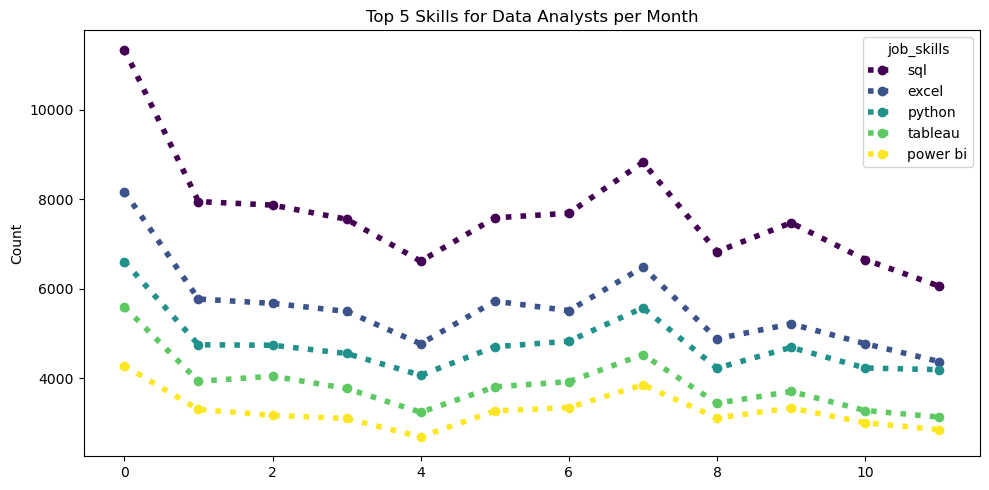

In [20]:
# Get the top 5 skills

df_DA_pivot.iloc[:, :5].plot(
    kind = "line",
    linewidth = 4,
    linestyle = ":",
    colormap = "viridis",
    marker = "o",
    markersize = 6,
    figsize = (10,5)
    )

plt.title('Top 5 Skills for Data Analysts per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.tight_layout()
plt.show()

In [22]:
df3 = df[df["job_title_short"] == "Data Analyst"].copy()

df3_explode = df3.explode("job_skills")

skill_stat = df3_explode.groupby("job_skills").agg(
    skill_count = ("job_skills", "count"),
    median_salary = ("salary_year_avg", "median")
)

skill_stats = skill_stat.sort_values(by = "skill_count", ascending = False).head(20)
skill_stats

,skill_count,median_salary
job_skills,,
sql,92428,92500.000000
excel,66860,84479.000000
python,57190,98500.000000
tableau,46455,95000.000000
power bi,39380,90000.000000
r,29996,92527.500000
sas,27998,90000.000000
powerpoint,13822,85000.000000
word,13562,80000.000000


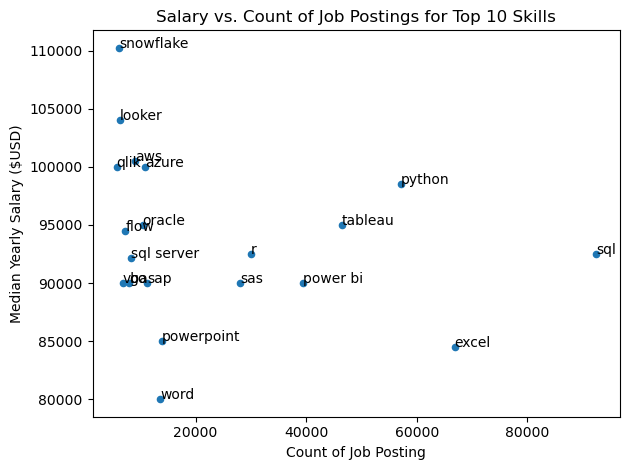

In [23]:
skill_stats.plot(kind = "scatter", x = "skill_count", y = "median_salary")
plt.xlabel("Count of Job Posting")
plt.ylabel("Median Yearly Salary ($USD)")
plt.title("Salary vs. Count of Job Postings for Top 10 Skills")

for i, col_name in enumerate(skill_stats.index):
    plt.text(skill_stats["skill_count"].iloc[i], skill_stats["median_salary"].iloc[i], col_name)


plt.tight_layout()
plt.show()

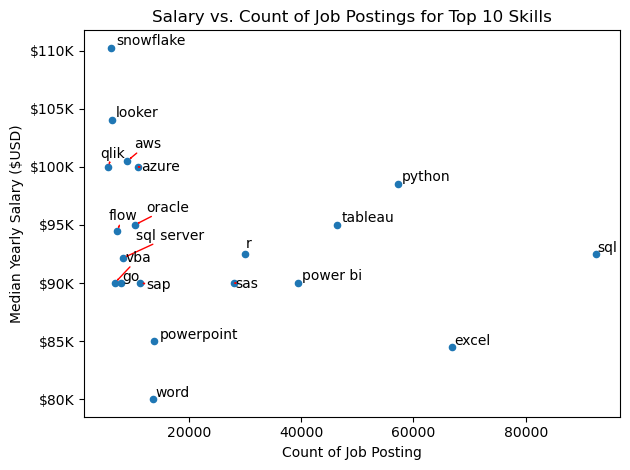

In [42]:
from adjustText import adjust_text


skill_stats.plot(kind = "scatter", x = "skill_count", y = "median_salary")
plt.xlabel("Count of Job Posting")
plt.ylabel("Median Yearly Salary ($USD)")
plt.title("Salary vs. Count of Job Postings for Top 10 Skills")

a = []

for i, col_name in enumerate(skill_stats.index):
    a.append(plt.text(skill_stats["skill_count"].iloc[i], skill_stats["median_salary"].iloc[i], col_name))


adjust_text(a, arrowprops = dict(arrowstyle = "->", color = 'r', lw = 1))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos : f"${int(y/1000)}K"))

plt.tight_layout()
plt.show()